In [137]:
import csv
import numpy as np
import matplotlib.pyplot as plt

In [138]:
data = []
with open('Admission_Predict.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        if line_count == 0:
            line_count += 1
        else:
            data.append(row)

In [139]:
data = np.array(data, dtype='float64')

### Definicion de Tamaños de Entrenamiento, Cross Validation, y Test
300 datos para entrenamiento, 75 para cross validation y 25 para pruebas de predicción.

In [140]:
split_data = np.split(data, [300, 375, 400])

training_data = split_data[0]
cross_validation_data = split_data[1]
test_data = split_data[2]

In [141]:
training_data = training_data[:, [1, 6, 8]]

In [142]:
X = training_data[:, [0, 1]]

In [143]:
y = training_data[:, 2]

### GreScore vs Probabilidad Admision

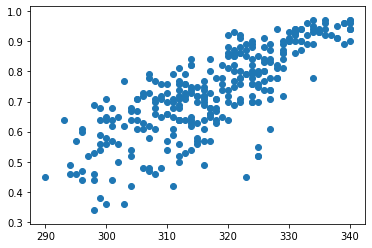

In [144]:
plt.scatter(X[:, 0], y)

### GPA vs Probabilidad Admision

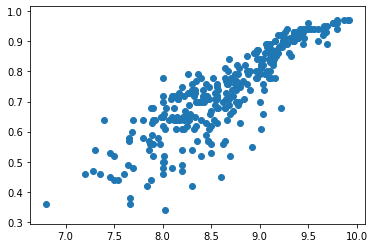

In [145]:
plt.scatter(X[:, 1], y)

In [146]:
y = y.reshape(len(y), 1)
y.shape

(300, 1)

In [147]:
X = np.vstack((np.ones(X.shape[0]), X[:, 0], X[:, 1])).T

### Ejecutar descenso de gradiente para encontrar nuestros coeficientes (theta)

In [180]:
m = np.size(y)
alpha = 0.00001
max_iter = 100000
_lambda = 1
lowest_error = float('inf')
best_lambda = 1
best_theta = []
theta_0 = np.random.rand(X.shape[1], 1)

while _lambda <= 10:
    theta, i = theta_0, 0
    if (len(best_theta) == 0):
        best_theta = theta
    while i < max_iter:
        h = np.matmul(X, theta)
        theta -= (alpha / m) * (np.matmul((h - y).T, X).T + _lambda * theta ** 2)
        i += 1

    error = 0
    for i in test_data:
        pred = theta[0][0] + theta[1][0] * i[6]
        error += abs((i[8] - pred))
    if (error / 25) * 100 < lowest_error:
        lowest_error = (error / 25) * 100
        best_lambda = _lambda
        best_theta = theta
    print('Lambda: ', _lambda,' -> error: ', (error / 25) * 100)
    _lambda += 1

print('Best Lambda: ', best_lambda)
print('Best Theta: ', best_theta)

Lambda:  1  -> error:  17.23618085985338
Lambda:  2  -> error:  17.766404161715954
Lambda:  3  -> error:  18.340447280875726
Lambda:  4  -> error:  18.921670794374503
Lambda:  5  -> error:  19.511809297186485
Lambda:  6  -> error:  20.111592332358043
Lambda:  7  -> error:  20.786486170052036
Lambda:  8  -> error:  21.512919020346928
Lambda:  9  -> error:  22.3105834647211
Lambda:  10  -> error:  23.16731732417181
Best Lambda:  1
Best Theta:  [[ 0.54821687]
 [-0.00493824]
 [ 0.20276221]]


### Gráfica de Modelo de Regresión Lineal

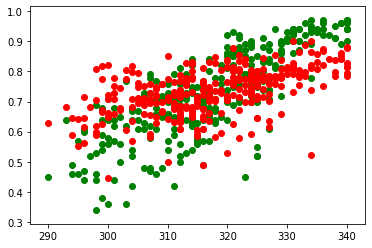

In [186]:
plt.scatter(X[:, 1], y, color='green')
plt.scatter(X[:, 1], np.matmul(X, best_theta), color='red')
plt.show()

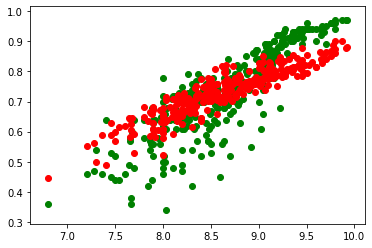

In [187]:
plt.scatter(X[:, 2], y, color='green')
plt.scatter(X[:, 2], np.matmul(X, best_theta), color='red')
plt.show()

### Conclusiones
1. El mejor valor de Lambda que se ajusta a nuestros datos es 5.
2. De las graficas podemos concluir que la variable GRE Score presenta una alta varianza.